In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Ignoring warnings

In [90]:
import warnings
warnings.filterwarnings('ignore')

# Loading the train dataset

In [91]:
df = pd.read_csv('/kaggle/input/dataset-v2/train.csv')
df.head()

,id,feedback_text,toxic,abusive,vulgar,menace,offense,bigotry
0,281d77b7bebc2201,:::Sounds good. Let me know when you're done ...,0,0,0,0,0,0
1,716aac7bf3c63db1,"""\nI say something, but it didn't actually con...",0,0,0,0,0,0
2,57cb318c6edcf10c,"""Agustina Barrientos]] \n | Modelo de Piñeiro ...",0,0,0,0,0,0
3,dc3bd70118d91b3a,FYI I enjoy licking strangers scrotal sacks......,1,0,1,0,0,0
4,cf10d41f2997d233,How do you get a site?\nMany penguins have ask...,0,0,0,0,0,0


# exploratory data analysis

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23473 entries, 0 to 23472
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             23473 non-null  object
 1   feedback_text  23473 non-null  object
 2   toxic          23473 non-null  int64 
 3   abusive        23473 non-null  int64 
 4   vulgar         23473 non-null  int64 
 5   menace         23473 non-null  int64 
 6   offense        23473 non-null  int64 
 7   bigotry        23473 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.4+ MB


In [93]:
df.describe()

,toxic,abusive,vulgar,menace,offense,bigotry
count,23473.000000,23473.000000,23473.000000,23473.000000,23473.000000,23473.000000
mean,0.093554,0.007498,0.054318,0.002812,0.048992,0.008222
std,0.291214,0.086267,0.226648,0.052952,0.215857,0.090305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
df.isnull().sum()

id               0
feedback_text    0
toxic            0
abusive          0
vulgar           0
menace           0
offense          0
bigotry          0
dtype: int64

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

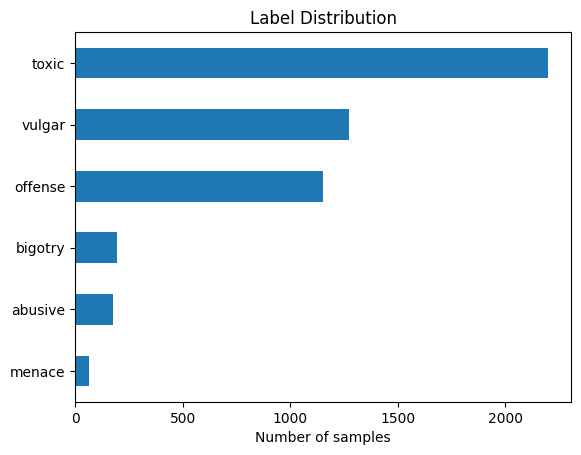

In [96]:
labels = ['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']
df[labels].sum().sort_values().plot(kind='barh', title='Label Distribution')
plt.xlabel("Number of samples")
plt.show()

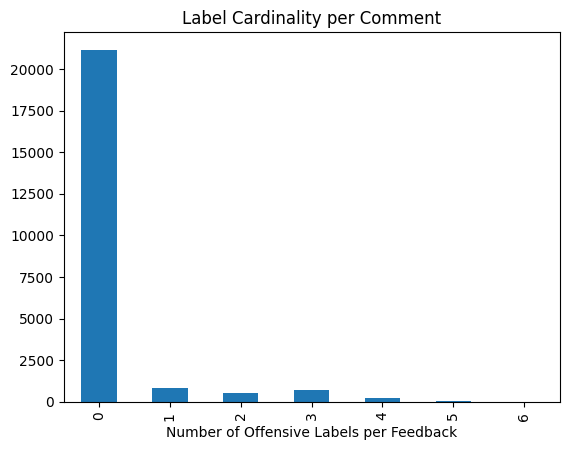

In [97]:
df['num_labels'] = df[labels].sum(axis=1)
df['num_labels'].value_counts().sort_index().plot(kind='bar', title='Label Cardinality per Comment')
plt.xlabel("Number of Offensive Labels per Feedback")
plt.show()

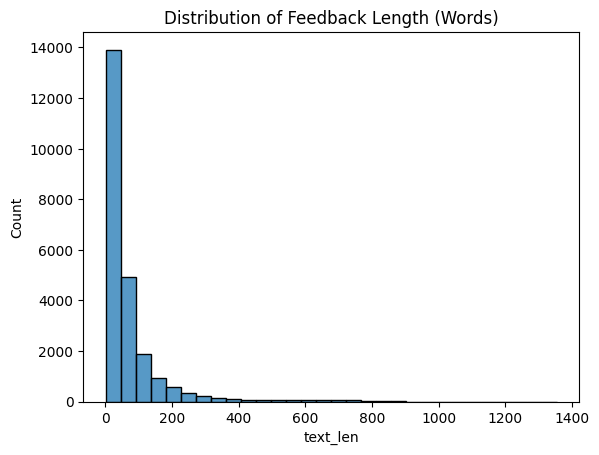

In [98]:
df['text_len'] = df['feedback_text'].apply(lambda x: len(str(x).split()))
sns.histplot(df['text_len'], bins=30)
plt.title("Distribution of Feedback Length (Words)")
plt.show()

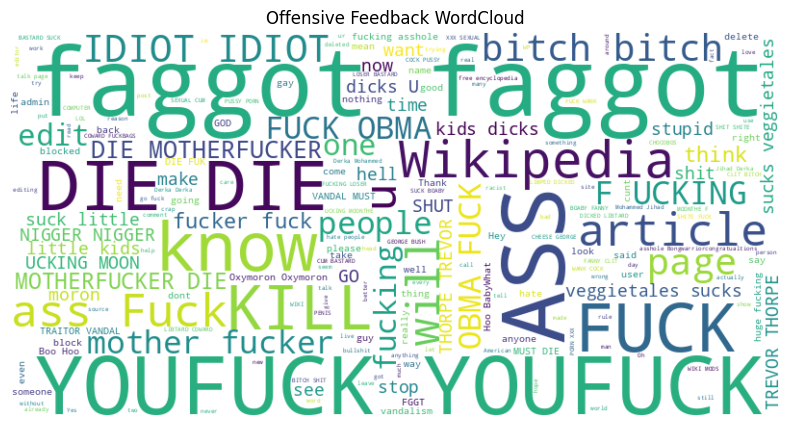

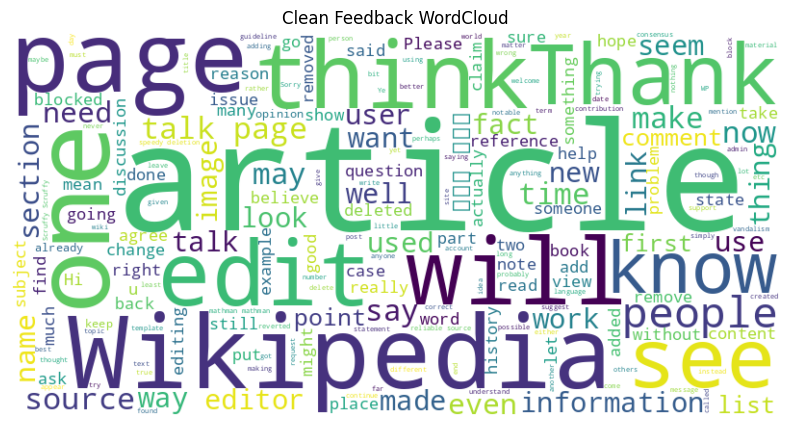

In [99]:
from wordcloud import WordCloud

def show_wordcloud(data, title):
    text = " ".join(data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Offensive
show_wordcloud(df[df['num_labels'] > 0]['feedback_text'], 'Offensive Feedback WordCloud')

# Clean
show_wordcloud(df[df['num_labels'] == 0]['feedback_text'], 'Clean Feedback WordCloud')


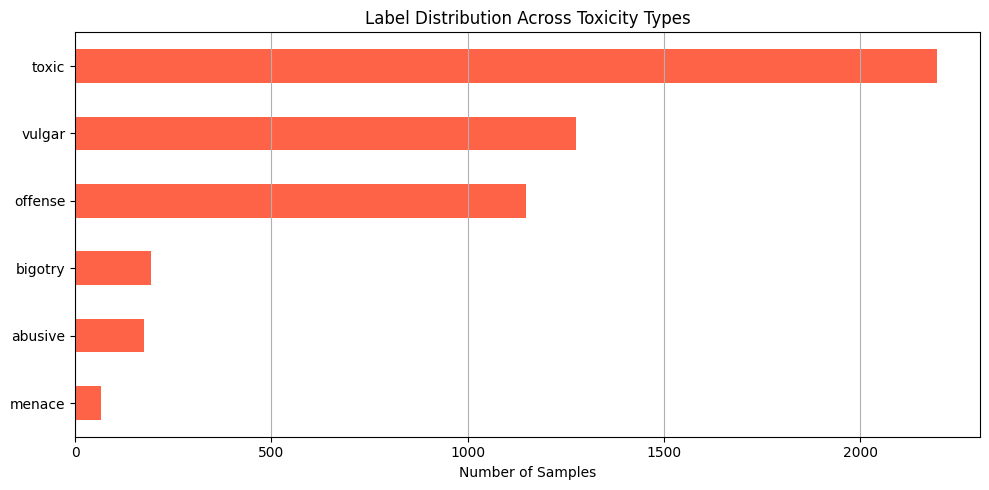

In [100]:
labels = ['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']

plt.figure(figsize=(10,5))
df[labels].sum().sort_values(ascending=True).plot(kind='barh', color='tomato')
plt.title("Label Distribution Across Toxicity Types")
plt.xlabel("Number of Samples")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [101]:
df['char_count'] = df['feedback_text'].apply(lambda x: len(str(x)))
df['word_count'] = df['feedback_text'].apply(lambda x: len(str(x).split()))


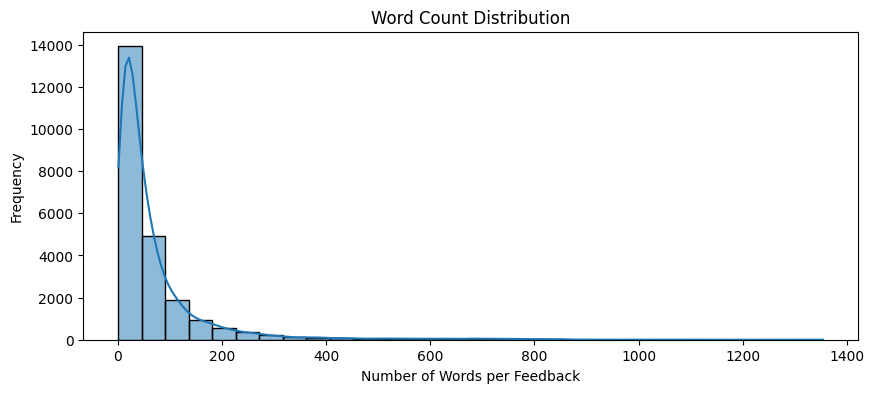

In [102]:
plt.figure(figsize=(10,4))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title("Word Count Distribution")
plt.xlabel("Number of Words per Feedback")
plt.ylabel("Frequency")
plt.show()


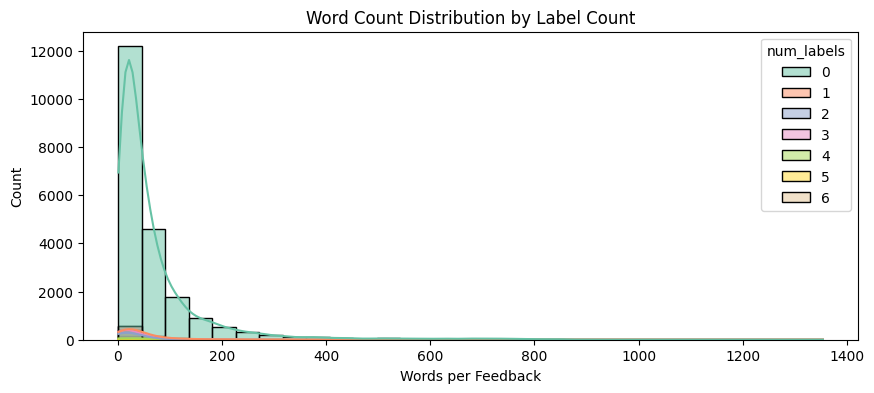

In [103]:
df['num_labels'] = df[labels].sum(axis=1)

plt.figure(figsize=(10,4))
sns.histplot(data=df, x='word_count', hue='num_labels', bins=30, kde=True, palette='Set2')
plt.title("Word Count Distribution by Label Count")
plt.xlabel("Words per Feedback")
plt.ylabel("Count")
plt.show()


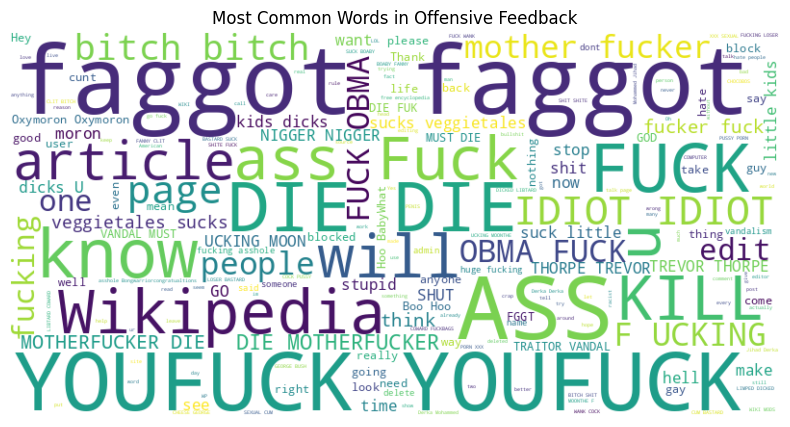

In [104]:
offensive_text = df[df['num_labels'] > 0]['feedback_text'].astype(str).str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(offensive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Offensive Feedback")
plt.show()


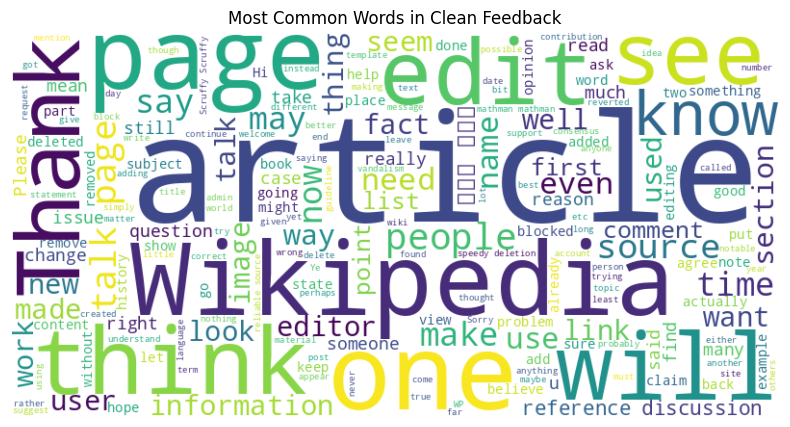

In [105]:
clean_text = df[df['num_labels'] == 0]['feedback_text'].astype(str).str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Clean Feedback")
plt.show()


In [106]:
print(df.isnull().sum())

id               0
feedback_text    0
toxic            0
abusive          0
vulgar           0
menace           0
offense          0
bigotry          0
num_labels       0
text_len         0
char_count       0
word_count       0
dtype: int64


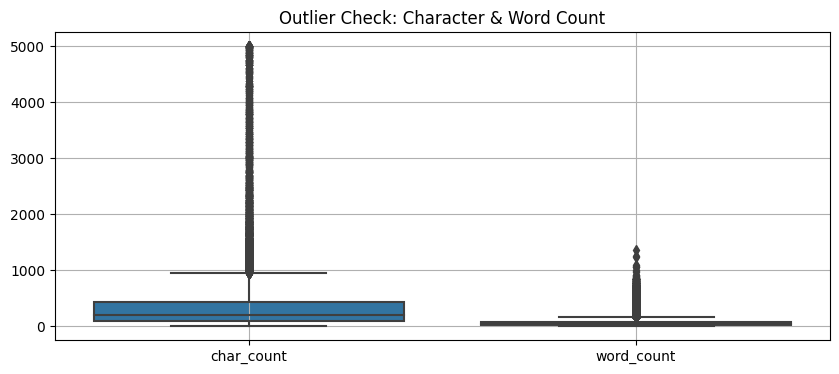

In [107]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df[['char_count', 'word_count']])
plt.title("Outlier Check: Character & Word Count")
plt.grid(True)
plt.show()


# Preprocessing

In [108]:
#df = df[df['word_count'] < 100]  # Example filter


In [109]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [110]:
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters, punctuation, numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(cleaned)


In [111]:
df['clean_text'] = df['feedback_text'].astype(str).apply(clean_text)


In [112]:
df.head()

,id,feedback_text,toxic,abusive,vulgar,menace,offense,bigotry,num_labels,text_len,char_count,word_count,clean_text
0,281d77b7bebc2201,:::Sounds good. Let me know when you're done ...,0,0,0,0,0,0,0,13,68,13,sound good let know youre done ill start pr
1,716aac7bf3c63db1,"""\nI say something, but it didn't actually con...",0,0,0,0,0,0,0,85,413,85,say something didnt actually confirm anything ...
2,57cb318c6edcf10c,"""Agustina Barrientos]] \n | Modelo de Piñeiro ...",0,0,0,0,0,0,0,22,173,22,agustina barrientos modelo de pieiro jun cruz ...
3,dc3bd70118d91b3a,FYI I enjoy licking strangers scrotal sacks......,1,0,1,0,0,0,2,10,73,10,fyi enjoy licking stranger scrotal sacksespeci...
4,cf10d41f2997d233,How do you get a site?\nMany penguins have ask...,0,0,0,0,0,0,0,88,432,88,get site many penguin asked question simple go...


In [113]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [114]:
df['tokens'] = df['clean_text'].apply(word_tokenize)


In [115]:
df.head()

,id,feedback_text,toxic,abusive,vulgar,menace,offense,bigotry,num_labels,text_len,char_count,word_count,clean_text,tokens
0,281d77b7bebc2201,:::Sounds good. Let me know when you're done ...,0,0,0,0,0,0,0,13,68,13,sound good let know youre done ill start pr,"[sound, good, let, know, youre, done, ill, sta..."
1,716aac7bf3c63db1,"""\nI say something, but it didn't actually con...",0,0,0,0,0,0,0,85,413,85,say something didnt actually confirm anything ...,"[say, something, didnt, actually, confirm, any..."
2,57cb318c6edcf10c,"""Agustina Barrientos]] \n | Modelo de Piñeiro ...",0,0,0,0,0,0,0,22,173,22,agustina barrientos modelo de pieiro jun cruz ...,"[agustina, barrientos, modelo, de, pieiro, jun..."
3,dc3bd70118d91b3a,FYI I enjoy licking strangers scrotal sacks......,1,0,1,0,0,0,2,10,73,10,fyi enjoy licking stranger scrotal sacksespeci...,"[fyi, enjoy, licking, stranger, scrotal, sacks..."
4,cf10d41f2997d233,How do you get a site?\nMany penguins have ask...,0,0,0,0,0,0,0,88,432,88,get site many penguin asked question simple go...,"[get, site, many, penguin, asked, question, si..."


In [116]:
pip install gensim


Note: you may need to restart the kernel to use updated packages.


In [117]:
df = df.drop('id', axis=1)

In [118]:
df = df.drop('feedback_text', axis=1)

In [119]:
df.head()

,toxic,abusive,vulgar,menace,offense,bigotry,num_labels,text_len,char_count,word_count,clean_text,tokens
0,0,0,0,0,0,0,0,13,68,13,sound good let know youre done ill start pr,"[sound, good, let, know, youre, done, ill, sta..."
1,0,0,0,0,0,0,0,85,413,85,say something didnt actually confirm anything ...,"[say, something, didnt, actually, confirm, any..."
2,0,0,0,0,0,0,0,22,173,22,agustina barrientos modelo de pieiro jun cruz ...,"[agustina, barrientos, modelo, de, pieiro, jun..."
3,1,0,1,0,0,0,2,10,73,10,fyi enjoy licking stranger scrotal sacksespeci...,"[fyi, enjoy, licking, stranger, scrotal, sacks..."
4,0,0,0,0,0,0,0,88,432,88,get site many penguin asked question simple go...,"[get, site, many, penguin, asked, question, si..."


In [120]:
from gensim.models import Word2Vec

# Train Word2Vec on the tokens
w2v_model = Word2Vec(
    sentences=df['tokens'],    # Input: list of word lists
    vector_size=100,           # Output vector size for each word
    window=5,                  # Context window size
    min_count=1,               # Minimum word frequency to include
    workers=4,                 # CPU cores to use
    sg=1                       # Use skip-gram (sg=1), CBOW if sg=0
)

In [121]:
import numpy as np

def get_average_vector(tokens, model, dim=100):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(dim)

# Apply to all feedbacks
X = np.vstack(df['tokens'].apply(lambda x: get_average_vector(x, w2v_model)))


# input and target feature selection before feeding into model

In [122]:
target_cols = ['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']
y = df[target_cols].values

In [123]:
import numpy as np

# Select additional features
extra_features = df[['text_len', 'char_count', 'word_count']].values

# Combine Word2Vec + extra features
X_combined = np.hstack([X, extra_features])  # final shape: (n_samples, 103)


# train test split

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42
)


In [125]:
df.shape

(23473, 12)

# LSTM model building and training for multiclass classification

In [126]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert token list to sentence string
df['sentence'] = df['tokens'].apply(lambda x: ' '.join(x))

# Tokenize the sentence
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['sentence'])
sequences = tokenizer.texts_to_sequences(df['sentence'])

# Pad sequences
max_len = 100
X_seq = pad_sequences(sequences, maxlen=max_len, padding='post')

# Update y
y = df[target_cols].values


In [127]:
import tensorflow as tf

vocab_size = len(tokenizer.word_index) + 1

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=100, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(target_cols), activation='sigmoid')  # multi-label output
])

model_lstm.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_lstm.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_seq, y, test_size=0.2, random_state=42)

history = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.2236 - loss: 0.3155 - val_accuracy: 0.9947 - val_loss: 0.1400
Epoch 2/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.5070 - loss: 0.1570 - val_accuracy: 0.9942 - val_loss: 0.0902
Epoch 3/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6014 - loss: 0.0906 - val_accuracy: 0.9947 - val_loss: 0.0714
Epoch 4/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6735 - loss: 0.0632 - val_accuracy: 0.9947 - val_loss: 0.0720
Epoch 5/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7207 - loss: 0.0490 - val_accuracy: 0.9947 - val_loss: 0.0737
Epoch 6/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7476 - loss: 0.0407 - val_accuracy: 0.9947 - val_loss: 0.0796
Epoch 7/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8154 - loss: 0.0377 - val_accuracy: 0.9947 - val_loss: 0.0836
Epoch 8/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8546 - loss: 0.0368 - val_acc

# Classification report

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get predicted probabilities
y_pred_prob = model_lstm.predict(X_test)

# Convert probabilities to binary using threshold
y_pred = (y_pred_prob >= 0.5).astype(int)

# Compute metrics (micro: all labels equally; macro: average over labels; samples: per sample)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")


147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Accuracy: 0.9035
Precision (macro): 0.4402
Recall (macro): 0.2798
F1-score (macro): 0.3276


In [130]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


# BERT model building and training for multiclass classification

In [131]:
from transformers import BertTokenizer

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode
encodings = bert_tokenizer(
    df['sentence'].tolist(),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors='tf'
)

X_input_ids = encodings['input_ids']
X_attention = encodings['attention_mask']


In [132]:
from transformers import TFBertModel
import tensorflow as tf

bert_base = TFBertModel.from_pretrained('bert-base-uncased')

input_ids = tf.keras.Input(shape=(128,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.Input(shape=(128,), dtype=tf.int32, name='attention_mask')

# Wrap in Lambda with output_shape specified
def extract_pooled_output(inputs):
    input_ids, attention_mask = inputs
    output = bert_base(input_ids=input_ids, attention_mask=attention_mask, return_dict=True)
    return output.pooler_output  # shape: (None, 768)

pooled_output = tf.keras.layers.Lambda(
    extract_pooled_output,
    output_shape=(768,)
)([input_ids, attention_mask])

x = tf.keras.layers.Dense(64, activation='relu')(pooled_output)
x = tf.keras.layers.Dropout(0.3)(x)
output = tf.keras.layers.Dense(len(target_cols), activation='sigmoid')(x)

model_bert = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model_bert.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_bert.summary()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_ids (InputLayer)    │ (None, 128)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_mask            │ (None, 128)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_3 (Lambda)         │ (None, 768)            │              0 │ input_ids[0][0],       │
│                           │                        │                │ attention_mask[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 64)             │         49,216 │ lambda_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 64)             │              0 │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 6)              │            390 │ dropout_4[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 49,606 (193.77 KB)

 Trainable params: 49,606 (193.77 KB)

 Non-trainable params: 0 (0.00 B)

In [133]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

# Assuming you have your data loaded into these variables:
# X_input_ids: TensorFlow tensor of shape (num_samples, sequence_length)  OR NumPy array
# X_attention: TensorFlow tensor of shape (num_samples, sequence_length)  OR NumPy array
# y: TensorFlow tensor of shape (num_samples, num_classes) or (num_samples,) OR NumPy array
# target_cols: List of target columns. Important for the model definition.

# 1. Split the data (convert to NumPy arrays if they are TensorFlow tensors)
if isinstance(X_input_ids, tf.Tensor):
    X_input_ids_np = X_input_ids.numpy()
else:
    X_input_ids_np = X_input_ids  # Assume it's already a NumPy array

if isinstance(X_attention, tf.Tensor):
    X_attention_np = X_attention.numpy()
else:
    X_attention_np = X_attention

if isinstance(y, tf.Tensor):
    y_np = y.numpy()
else:
    y_np = y

X_train_ids_np, X_test_ids_np, X_train_mask_np, X_test_mask_np, y_train_np, y_test_np = train_test_split(
    X_input_ids_np, X_attention_np, y_np, test_size=0.2, random_state=42
)

# 2. Convert NumPy arrays to TensorFlow tensors
X_train_ids = tf.convert_to_tensor(X_train_ids_np, dtype=tf.int32)
X_test_ids = tf.convert_to_tensor(X_test_ids_np, dtype=tf.int32)
X_train_mask = tf.convert_to_tensor(X_train_mask_np, dtype=tf.int32)
X_test_mask = tf.convert_to_tensor(X_test_mask_np, dtype=tf.int32)
y_train = tf.convert_to_tensor(y_train_np, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test_np, dtype=tf.float32)

# 3. Fit the model
history = model_bert.fit(
    {'input_ids': X_train_ids, 'attention_mask': X_train_mask},
    y_train,
    validation_data=(
        {'input_ids': X_test_ids, 'attention_mask': X_test_mask},
        y_test
    ),
    epochs=13,
    batch_size=16,
)


Epoch 1/13


W0000 00:00:1744477720.016053     137 assert_op.cc:38] Ignoring Assert operator functional_5_1/lambda_3_1/tf_bert_model_9/bert/embeddings/assert_less/Assert/Assert


1173/1174 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.2331 - loss: 0.3841

W0000 00:00:1744477852.221290     137 assert_op.cc:38] Ignoring Assert operator functional_5_1/lambda_3_1/tf_bert_model_9/bert/embeddings/assert_less/Assert/Assert


1174/1174 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.2332 - loss: 0.3840

W0000 00:00:1744477858.690140     136 assert_op.cc:38] Ignoring Assert operator functional_5_1/lambda_3_1/tf_bert_model_9/bert/embeddings/assert_less/Assert/Assert
W0000 00:00:1744477892.444091     137 assert_op.cc:38] Ignoring Assert operator functional_5_1/lambda_3_1/tf_bert_model_9/bert/embeddings/assert_less/Assert/Assert


1174/1174 ━━━━━━━━━━━━━━━━━━━━ 191s 145ms/step - accuracy: 0.2333 - loss: 0.3839 - val_accuracy: 0.9947 - val_loss: 0.1456
Epoch 2/13
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 158s 135ms/step - accuracy: 0.5168 - loss: 0.1737 - val_accuracy: 0.9947 - val_loss: 0.1413
Epoch 3/13
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 158s 135ms/step - accuracy: 0.5789 - loss: 0.1634 - val_accuracy: 0.9947 - val_loss: 0.1394
Epoch 4/13
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 158s 135ms/step - accuracy: 0.6141 - loss: 0.1715 - val_accuracy: 0.9947 - val_loss: 0.1388
Epoch 5/13
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 158s 135ms/step - accuracy: 0.6396 - loss: 0.1624 - val_accuracy: 0.9947 - val_loss: 0.1377
Epoch 6/13
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 159s 135ms/step - accuracy: 0.6479 - loss: 0.1550 - val_accuracy: 0.9947 - val_loss: 0.1374
Epoch 7/13
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 158s 135ms/step - accuracy: 0.6704 - loss: 0.1499 - val_accuracy: 0.9947 - val_loss: 0.1370
Epoch 8/13
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 159s 135ms/step - accuracy: 0.6

# Classification report

In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 4. Predict on test data
y_pred_probs = model_bert.predict({'input_ids': X_test_ids, 'attention_mask': X_test_mask})
y_pred = (y_pred_probs > 0.5).astype(int)  # Thresholding for multi-label

# 5. Convert y_test to NumPy (if still tensor)
y_test_np = y_test.numpy()

# 6. Compute metrics
accuracy = accuracy_score(y_test_np, y_pred)
precision = precision_score(y_test_np, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test_np, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test_np, y_pred, average='macro', zero_division=0)

# 7. Print
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")


W0000 00:00:1744479797.980502     136 assert_op.cc:38] Ignoring Assert operator functional_5_1/lambda_3_1/tf_bert_model_9/bert/embeddings/assert_less/Assert/Assert


146/147 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step

W0000 00:00:1744479837.427610     135 assert_op.cc:38] Ignoring Assert operator functional_5_1/lambda_3_1/tf_bert_model_9/bert/embeddings/assert_less/Assert/Assert


147/147 ━━━━━━━━━━━━━━━━━━━━ 43s 273ms/step
Accuracy:  0.9029
Precision: 0.0000
Recall:    0.0000
F1-score:  0.0000


# ROC curve

147/147 ━━━━━━━━━━━━━━━━━━━━ 35s 239ms/step


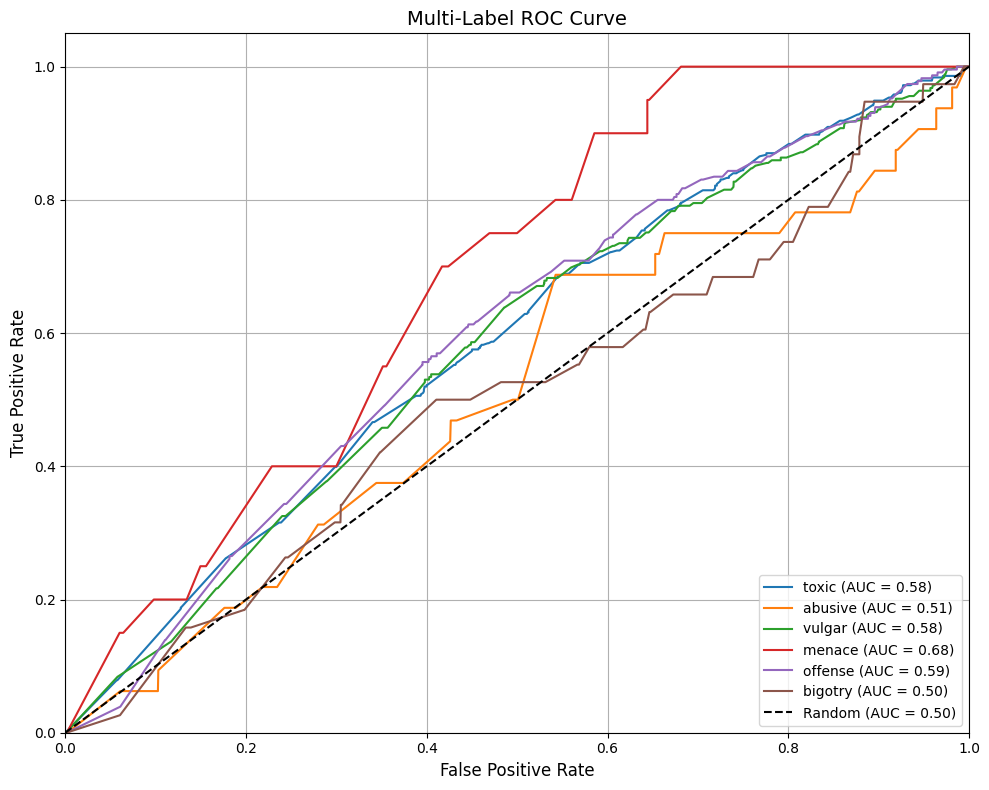

In [136]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# 1. Predict probabilities for the test set
y_pred_prob = model_bert.predict({'input_ids': X_test_ids, 'attention_mask': X_test_mask})

# 2. Ensure your y_test is in NumPy format (already done above)
# If y_test has shape (num_samples,), binarize it for binary/multiclass cases
# Not needed if it's already shape (num_samples, num_classes)

# 3. Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(target_cols)

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_np[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'{target_cols[i]} (AUC = {roc_auc[i]:.2f})')

# 4. Plot configuration
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Multi-Label ROC Curve', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


# Step 5: Model Tuning and Optimization
# Experiment with different optimizers (Adam, SGD, etc.) and activation functions
# Adjust learning rate, batch size, and number of epochs


**As I have already built and trained models, experimenting with different optimizers and activation functions and adjusting the learning rate, batch size, and number of epochs is not a complex task. Due to some constraints like time, device, internet, etc., I can't do it practically. But I am explaining how to do those things and where to change the values. I am marking these values or points in one or two images. We can iterate through different values of those important things**

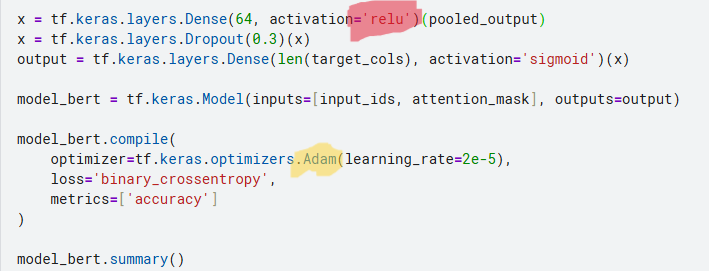

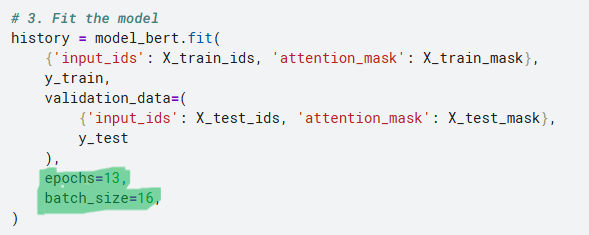